In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
# Load Participant_Status table
df = pd.read_csv('/home/mrudula/MLPOPS/outputs/airflow_cleaned_data.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737 entries, 0 to 3736
Columns: 335 entries, ENROLL_AGE to COHORT
dtypes: float64(334), int64(1)
memory usage: 9.6 MB


,ENROLL_AGE,ENRLPRKN_0.0,ENRLPRKN_0.2,ENRLPRKN_1.0,ENRLSRDC_0.0,ENRLSRDC_0.2,ENRLSRDC_0.4,ENRLSRDC_0.6,ENRLSRDC_0.8,ENRLSRDC_1.0,...,NP3RTCON_101.0,DYSKPRES_0.0,DYSKPRES_1.0,NHY_0.0,NHY_1.0,NHY_2.0,NHY_3.0,NHY_4.0,NHY_101.0,COHORT
0,0.498522,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
1,0.044707,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.328342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,-0.908303,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,-0.601978,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2


In [4]:
df.describe()

,ENROLL_AGE,ENRLPRKN_0.0,ENRLPRKN_0.2,ENRLPRKN_1.0,ENRLSRDC_0.0,ENRLSRDC_0.2,ENRLSRDC_0.4,ENRLSRDC_0.6,ENRLSRDC_0.8,ENRLSRDC_1.0,...,NP3RTCON_101.0,DYSKPRES_0.0,DYSKPRES_1.0,NHY_0.0,NHY_1.0,NHY_2.0,NHY_3.0,NHY_4.0,NHY_101.0,COHORT
count,3.737000e+03,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,...,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000
mean,-8.061817e-16,0.994381,0.002408,0.003211,0.675140,0.009901,0.007225,0.014450,0.024886,0.268397,...,0.000268,0.989296,0.010704,0.553385,0.167246,0.265721,0.011507,0.000535,0.001606,2.700294
std,1.000134e+00,0.074762,0.049022,0.056583,0.468385,0.099023,0.084704,0.119353,0.155799,0.443185,...,0.016358,0.102918,0.102918,0.497208,0.373246,0.441776,0.106664,0.023131,0.040043,1.418402
min,-4.345950e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-4.658340e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,9.008896e-02,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,6.573573e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000
max,2.835668e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [5]:
print(df.dtypes) 

ENROLL_AGE      float64
ENRLPRKN_0.0    float64
ENRLPRKN_0.2    float64
ENRLPRKN_1.0    float64
ENRLSRDC_0.0    float64
                 ...   
NHY_2.0         float64
NHY_3.0         float64
NHY_4.0         float64
NHY_101.0       float64
COHORT            int64
Length: 335, dtype: object


In [6]:
y=df['COHORT']
X=df.drop(columns=['COHORT'])

/home/mrudula/Projects/imagecaptioning/imagecaptioning/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:16:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


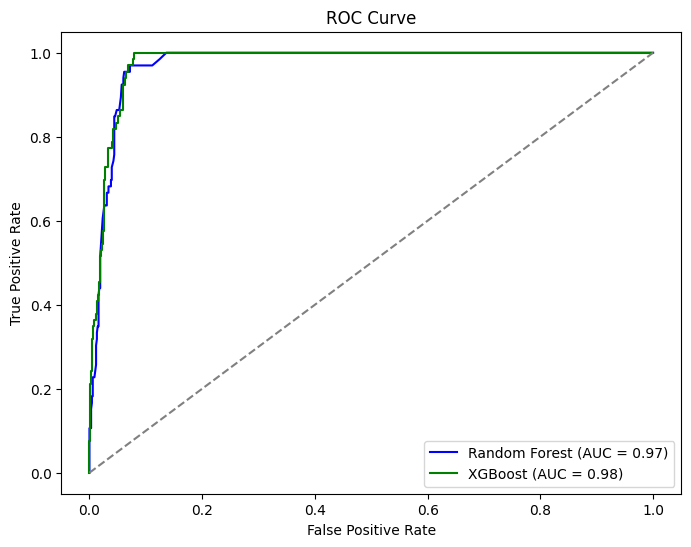

Random Forest F1 Score: 0.8996
XGBoost F1 Score: 0.9186
Random Forest AUC: 0.9732
XGBoost AUC: 0.9767


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report


y = LabelEncoder().fit_transform(y)
# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train Random Forest
rf_model.fit(X_train, y_train)

# Train XGBoost
xgb_model.fit(X_train, y_train)

# Predict on test data
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# F1 Score
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# ROC Curve and AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=1)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1], pos_label=1)

rf_auc = auc(rf_fpr, rf_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, color='green', label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Output the metrics
print(f"Random Forest F1 Score: {rf_f1:.4f}")
print(f"XGBoost F1 Score: {xgb_f1:.4f}")
print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"XGBoost AUC: {xgb_auc:.4f}")



In [8]:
rf_f1 = classification_report(y_test, rf_pred,zero_division=0)
xgb_f1=classification_report(y_test, xgb_pred,zero_division=0)
print(rf_f1)
print(xgb_f1)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       279
           1       0.67      0.64      0.65        66
           2       0.00      0.00      0.00        16
           3       0.93      0.94      0.94       387

    accuracy                           0.91       748
   macro avg       0.63      0.64      0.64       748
weighted avg       0.89      0.91      0.90       748

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       279
           1       0.69      0.74      0.72        66
           2       0.50      0.19      0.27        16
           3       0.95      0.94      0.95       387

    accuracy                           0.92       748
   macro avg       0.77      0.71      0.72       748
weighted avg       0.92      0.92      0.92       748

